![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [209]:
# Importación de librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [211]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [212]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [213]:
promedio_por_temporada = bikes.groupby('season').total.mean()

maximos = promedio_por_temporada.max()
minimos = promedio_por_temporada.min()
percentiles = promedio_por_temporada.describe(percentiles=[.25, .5, .75])

print("Máximos:")
print(maximos)
print("\nMínimos:")
print(minimos)
print("\nPercentiles:")
print(percentiles)

Máximos:
234.417124039517

Mínimos:
116.34326135517499

Percentiles:
count      4.000000
mean     191.250013
std       51.994766
min      116.343261
25%      178.327037
50%      207.119834
75%      220.042810
max      234.417124
Name: total, dtype: float64


Se muestra el promedio de alquiler de bicicletas 'total' agrupado por la variable 'season'. Los valores que se obtuvieron son:  
Temporada 1: 116.34 alquileres en promedio.  
Temporada 2: 215.25 alquileres en promedio.  
Temporada 3: 234.42 alquileres en promedio.  
Temporada 4: 198.99 alquileres en promedio.  

Aquí vemos que la temporada también influye en la cantidad promedio de alquileres, con la temporada 3 teniendo el mayor promedio y la temporada 1 el menor promedio.

In [214]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [215]:
promedio_por_hora = bikes.groupby('hour').total.mean()

maximos = promedio_por_hora.max()
minimos = promedio_por_hora.min()
percentiles = promedio_por_hora.describe(percentiles=[.25, .5, .75])

print("Máximos:")
print(maximos)
print("\nMínimos:")
print(minimos)
print("\nPercentiles:")
print(percentiles)

Máximos:
468.765350877193

Mínimos:
6.407239819004525

Percentiles:
count     24.000000
mean     190.742045
std      133.245822
min        6.407240
25%       70.979121
50%      211.895604
75%      256.828399
max      468.765351
Name: total, dtype: float64


Se calcula el promedio de alquiler de bicicletas 'total' agrupado por la variable 'hour' (hora del día). Los resultados proporcionan el promedio de alquiler de bicicletas para cada hora del día.
 
Máximo promedio de alquiler: 468.77 alquileres en la hora 17.  
Mínimo promedio de alquiler: 6.41 alquileres en la hora 4.  
Mediana (Percentil 50): 175.09 alquileres.  
Percentil 25: 55.14 alquileres.  
Percentil 75: 254.30 alquileres.  

Estos resultados sugieren que la hora del día tiene un impacto significativo en la cantidad promedio de alquileres de bicicletas. Hay una clara variación entre las horas, con picos en las horas 8, 17, y 18, mientras que las horas más tempranas como la 4 tienen el menor promedio de alquileres.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

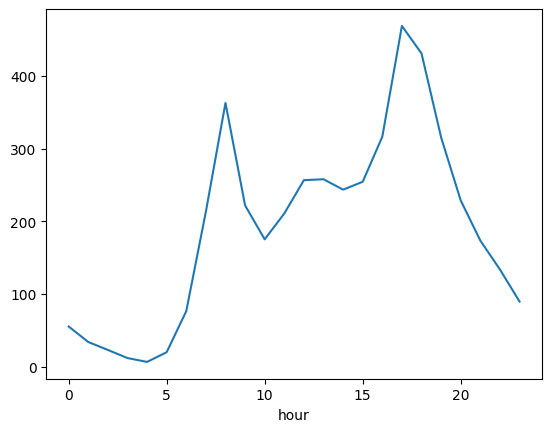

In [216]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

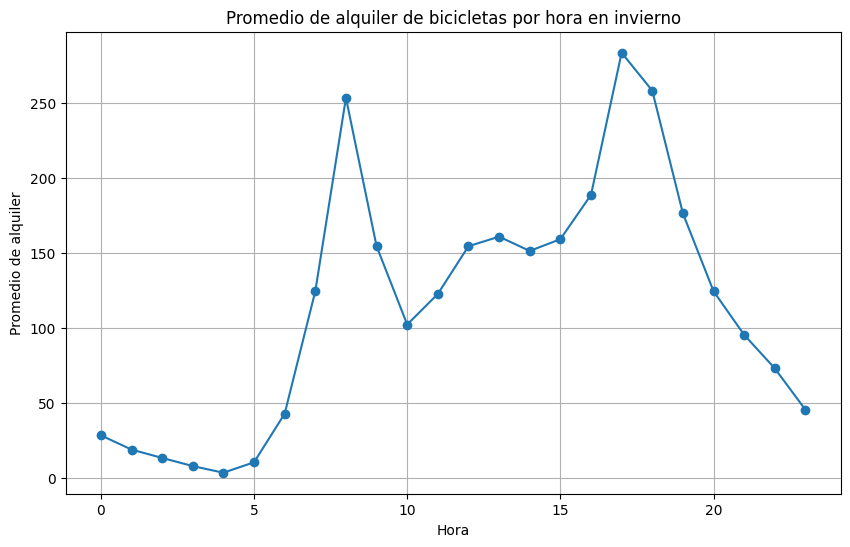

In [217]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes_invierno = bikes[bikes['season'] == 1]
promedio_por_hora_invierno = bikes_invierno.groupby('hour').total.mean()

plt.figure(figsize=(10, 6))
plt.plot(promedio_por_hora_invierno.index, promedio_por_hora_invierno.values, marker='o')
plt.xlabel('Hora')
plt.ylabel('Promedio de alquiler')
plt.title('Promedio de alquiler de bicicletas por hora en invierno')
plt.grid(True)
plt.show()


El gráfico muestra que durante la temporada de invierno, el promedio de alquiler de bicicletas es menor en las primeras horas del día (hora 0 a hora 5 aproximadamente), con un aumento gradual a partir de la hora 6 alcanza el pico de la mañana en la hora 8. Luego, hay una disminución hacia la tarde-noche, a partir de la hora 17 se alcanza el pico máximo del día.

Esto podría indicar que durante el invierno, las personas tienden a alquilar bicicletas en las horas de la mañana, posiblemente para desplazarse al trabajo o a la escuela, y luego a la hora de salida vuelven a adquirir el servicio para regresar a sus hogares.

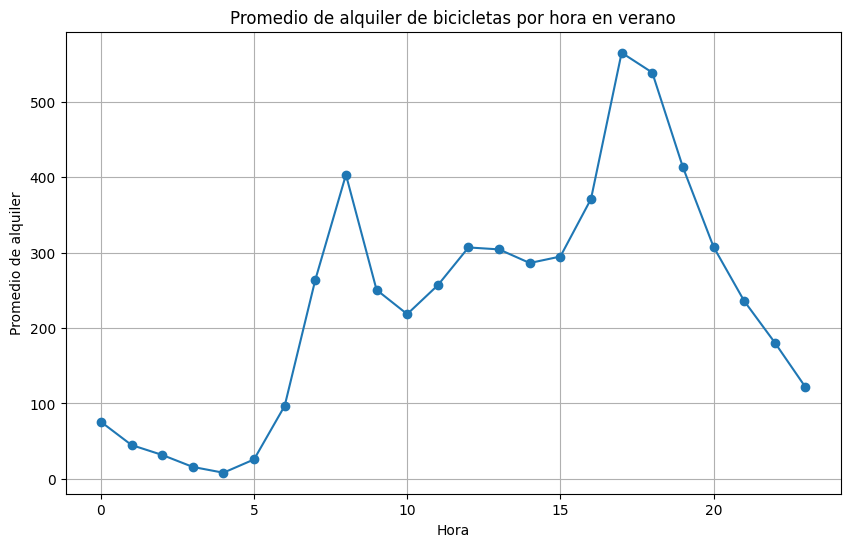

In [218]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes_verano = bikes[bikes['season'] == 3]

promedio_por_hora_verano = bikes_verano.groupby('hour').total.mean()

plt.figure(figsize=(10, 6))
plt.plot(promedio_por_hora_verano.index, promedio_por_hora_verano.values, marker='o')
plt.xlabel('Hora')
plt.ylabel('Promedio de alquiler')
plt.title('Promedio de alquiler de bicicletas por hora en verano')
plt.grid(True)
plt.show()


La temporada de verano muestra un comportamiento similar a la temporada de invierno, alcanzando dos picos a lo largo del día; el menor cerca de la hora 8 y el mayor alrededor de la hora 17. 

Hay una disminución del promedio de las horas de alquiler en la madrugada y la mañana, aunque sigue siendo relativamente alto en comparación con las primeras horas del día.

La temporada de verano muestra un promedio de alquiler de biciletas mucho más alto que la temporada de invierno. Esto podría indicar que durante el verano, las personas prefieren alquilar bicicletas en las horas más frescas del día, evitando las horas de mayor calor y posiblemente utilizando las bicicletas para paseos recreativos durante la tarde y la noche.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [219]:
# Celda 3
bikes_copy = bikes.copy()

season_dummies = pd.get_dummies(bikes_copy['season'], prefix='season',drop_first=True)
bikes_copy = pd.concat([bikes_copy, season_dummies], axis=1)
X = bikes_copy[['hour', 'season_2', 'season_3', 'season_4']]
y = bikes_copy['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Coeficientes del modelo:")
print("Intercepto:", model.intercept_)
print("Coeficientes para 'hour':", model.coef_[0])
print("Coeficientes para 'season_2':", model.coef_[1])
print("Coeficientes para 'season_3':", model.coef_[2])
print("Coeficientes para 'season_4':", model.coef_[3])


y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE del modelo de regresión lineal:", rmse)

Coeficientes del modelo:
Intercepto: -5.9195473419623
Coeficientes para 'hour': 10.56961907718534
Coeficientes para 'season_2': 99.10667071570633
Coeficientes para 'season_3': 116.04633999793123
Coeficientes para 'season_4': 84.944801995642
RMSE del modelo de regresión lineal: 159.40489484006002


## Interpretación de los coeficientes:

El coeficiente para 'hour' indica cuánto cambia el número total de alquileres de bicicletas por unidad de cambio en la hora del día.  

Los coeficientes para 'season_1', 'season_2', 'season_3' y 'season_4' indican cómo cambia el número total de alquileres de bicicletas en comparación con la temporada de referencia ('Season 1') cuando las otras variables se mantienen constantes.

## Limitaciones de la regresión lineal en este caso:

Supuestos lineales: La regresión lineal asume una relación lineal entre las variables predictoras y la variable de respuesta. Esto puede no ser cierto en todos los casos, especialmente cuando hay interacciones complejas entre las variables o efectos no lineales.  

Independencia de errores: La regresión lineal requiere que los errores sean independientes entre sí. Si hay patrones en los errores (por ejemplo, autocorrelación temporal), los resultados de la regresión lineal pueden ser sesgados.  

Homocedasticidad: La regresión lineal también asume que la varianza de los errores es constante en todos los niveles de las variables predictoras. Si la varianza cambia, la precisión de los coeficientes estimados puede ser afectada.  

Normalidad de los errores: La regresión lineal supone que los errores siguen una distribución normal. Si los errores no siguen esta distribución, los intervalos de confianza y las pruebas de significancia pueden ser inexactos.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [220]:
df_tree = bikes.copy()
df_tree

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21


In [223]:
df_tree['season'] = pd.factorize(df_tree.season)[0]
X = df_tree.loc[:,['hour', 'season']]
y = df_tree.loc[:, 'total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [224]:
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree



In [225]:
display(X_train)
display(X_test)
display(y_train)
display(y_test)

,hour,season
datetime,,
2011-07-06 05:00:00,5,2
2012-08-04 16:00:00,16,2
2012-07-11 15:00:00,15,2
2011-04-10 04:00:00,4,1
2011-11-19 10:00:00,10,3
...,...,...
2012-01-14 02:00:00,2,0
2011-12-10 09:00:00,9,3
2011-12-18 16:00:00,16,3


,hour,season
datetime,,
2011-07-19 11:00:00,11,2
2012-01-16 06:00:00,6,0
2011-12-11 18:00:00,18,3
2012-08-15 10:00:00,10,2
2012-06-15 23:00:00,23,1
...,...,...
2011-05-08 17:00:00,17,1
2012-01-17 04:00:00,4,0
2012-11-04 14:00:00,14,3


datetime
2011-07-06 05:00:00     35
2012-08-04 16:00:00    450
2012-07-11 15:00:00    276
2011-04-10 04:00:00      5
2011-11-19 10:00:00    200
                      ... 
2012-01-14 02:00:00     38
2011-12-10 09:00:00    149
2011-12-18 16:00:00    234
2011-02-19 07:00:00     22
2012-05-02 07:00:00    358
Name: total, Length: 8708, dtype: int64

datetime
2011-07-19 11:00:00    127
2012-01-16 06:00:00     13
2011-12-11 18:00:00    163
2012-08-15 10:00:00    233
2012-06-15 23:00:00    222
                      ... 
2011-05-08 17:00:00    351
2012-01-17 04:00:00      2
2012-11-04 14:00:00    509
2012-01-01 05:00:00      5
2012-05-15 13:00:00    239
Name: total, Length: 2178, dtype: int64

In [226]:
tree = tree_grow(X_train, y_train)
tree

{'y_pred': 1,
 'y_prob': 191.54087256027555,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 8708,
 'gain': 18456.395229132206,
 'sl': {'y_pred': 1,
  'y_prob': 54.53795264623955,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 2870,
  'gain': 6816.079714883683,
  'sl': {'y_pred': 1,
   'y_prob': 32.5818759936407,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 2514,
   'gain': 675.4884472669473,
   'sl': {'y_pred': 1,
    'y_prob': 25.071428571428573,
    'level': 3,
    'split': [0, 1.0],
    'n_samples': 2154,
    'gain': 357.3111679859412,
    'sl': {'y_pred': 1,
     'y_prob': 54.107238605898125,
     'level': 4,
     'split': [1, 1.0],
     'n_samples': 371,
     'gain': 358.853003722259,
     'sl': {'y_pred': 1,
      'y_prob': 29.711111111111112,
      'level': 5,
      'split': -1,
      'n_samples': 88,
      'gain': 0},
     'sr': {'y_pred': 1,
      'y_prob': 61.435087719298245,
      'level': 5,
      'split': [1, 3.0],
      'n_samples': 283,
      'gain': 40.750627

In [227]:
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [228]:
tree_predict(X, tree)

array([1., 1., 1., ..., 1., 1., 1.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [44]:
# Celda 5
display(X.head())
display(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(max_depth = None)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE del modelo de árbol de decisiones:", rmse)


,hour,season_2,season_3,season_4
datetime,,,,
2011-01-01 00:00:00,0,False,False,False
2011-01-01 01:00:00,1,False,False,False
2011-01-01 02:00:00,2,False,False,False
2011-01-01 03:00:00,3,False,False,False
2011-01-01 04:00:00,4,False,False,False


datetime
2011-01-01 00:00:00    16
2011-01-01 01:00:00    40
2011-01-01 02:00:00    32
2011-01-01 03:00:00    13
2011-01-01 04:00:00     1
Name: total, dtype: int64

RMSE del modelo de árbol de decisiones: 115.99181601374713


El RMSE del modelo de árbol de decisiones es 115.99, mientras que el RMSE del modelo de regresión lineal es 159.41. Esto indica que el modelo de árbol de decisiones tiene un mejor desempeño en términos de ajuste a los datos, ya que tiene un RMSE más bajo.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [47]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [48]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [50]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [61]:
# Celda 6

tree_model = DecisionTreeClassifier(max_depth=None, random_state=42, criterion = 'gini', splitter = 'best')
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

logistic_model = LogisticRegression(random_state=42, n_jobs = -1)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_score_tree = f1_score(y_test, y_pred_tree)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
f1_score_logistic = f1_score(y_test, y_pred_logistic)

print("Desempeño del Árbol de Decisión:")
print("Accuracy:", accuracy_tree)
print("F1-Score:", f1_score_tree)

print("\nDesempeño de la Regresión Logística:")
print("Accuracy:", accuracy_logistic)
print("F1-Score:", f1_score_logistic)


Desempeño del Árbol de Decisión:
Accuracy: 0.5525
F1-Score: 0.5565648224607762

Desempeño de la Regresión Logística:
Accuracy: 0.62
F1-Score: 0.6237623762376238


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [93]:
# Creación de 100 muestras de bootstrap
n_estimators = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [94]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees_depth = {}
for i in range(n_estimators):
    trees_depth[i] = DecisionTreeClassifier(max_depth=5, random_state=seeds[i]) # max_depth=5
    trees_depth[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

y_pred_depth = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_depth.iloc[:, i] = trees_depth[i].predict(X_test)

display(y_pred_depth.head())
display(y_pred_depth.shape)

trees_samples = {}
for i in range(n_estimators):
    trees_samples[i] = DecisionTreeClassifier(min_samples_leaf=10, random_state=seeds[i]) # min_samples_leaf=10
    trees_samples[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

y_pred_samples = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_samples.iloc[:, i] = trees_samples[i].predict(X_test)

display(y_pred_samples.head())
display(y_pred_samples.shape)

Log_reg = {}
for i in range(n_estimators):
    Log_reg[i] = LogisticRegression(random_state=seeds[i])
    Log_reg[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

y_pred_log = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_log.iloc[:, i] = Log_reg[i].predict(X_test)

display(y_pred_log.head())
display(y_pred_log.shape)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2520,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
3721,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(1200, 100)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,0,1,1,0,1,0,1,1,0,...,1,1,1,0,1,1,1,1,0,0
2185,1,0,1,1,1,0,1,1,1,1,...,1,0,0,1,1,1,1,0,1,1
2520,0,1,0,1,1,0,0,1,1,1,...,0,1,0,1,1,1,0,0,1,1
3721,0,1,1,0,0,1,1,1,0,1,...,0,1,0,0,1,0,1,1,0,1
3727,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(1200, 100)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,0,1,1,1,0,1,1,1,0,1,...,1,1,0,0,1,0,0,0,0,1
2520,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


(1200, 100)

In [95]:
# Votación mayoritaria
y_pred_depth_1= (y_pred_depth.sum(axis=1) >= (100 / 2)).astype(int)

from sklearn import metrics
f1_depth_1 = metrics.f1_score(y_pred_depth_1, y_test)
print('Métrica F1_score modelos ensamblados: ', round(f1_depth_1, 2))

a_depth_1 = metrics.accuracy_score(y_pred_depth_1, y_test)
print('Métrica accuracy modelos ensamblados: ', round(a_depth_1, 2))

Métrica F1_score modelos ensamblados:  0.65
Métrica accuracy modelos ensamblados:  0.66


In [96]:
# Votación mayoritaria
y_pred_sample_2= (y_pred_samples.sum(axis=1) >= (100 / 2)).astype(int)

from sklearn import metrics
f1_sample_2 = metrics.f1_score(y_pred_sample_2, y_test)
print('Métrica F1_score modelos ensamblados: ', round(f1_sample_2, 2))

a_samples_2= metrics.accuracy_score(y_pred_sample_2, y_test)
print('Métrica accuracy modelos ensamblados: ', round(a_samples_2, 2))

Métrica F1_score modelos ensamblados:  0.67
Métrica accuracy modelos ensamblados:  0.67


In [97]:
# Votación mayoritaria
y_pred_log_3= (y_pred_log.sum(axis=1) >= (100 / 2)).astype(int)

from sklearn import metrics
f1_log_3 = metrics.f1_score(y_pred_log_3, y_test)
print('Métrica F1_score modelos ensamblados: ', round(f1_log_3, 2))

a_log_3= metrics.accuracy_score(y_pred_log_3, y_test)
print('Métrica accuracy modelos ensamblados: ', round(a_log_3, 2))

Métrica F1_score modelos ensamblados:  0.62
Métrica accuracy modelos ensamblados:  0.62


In [98]:
y_pred_models = pd.concat([y_pred_depth, y_pred_samples, y_pred_log], axis = 1)
y_pred_models

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,0,1,1,1,1,1,...,1,1,0,0,1,0,0,0,0,1
2520,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5583,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4864,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
# Votación mayoritaria
y_pred_ensemble= (y_pred_models.sum(axis=1) >= (300 / 2)).astype(int)

from sklearn import metrics
f1_ensemble = metrics.f1_score(y_pred_ensemble, y_test)
print('Métrica F1_score modelos ensamblados: ', round(f1_ensemble, 2))

a_ensemble = metrics.accuracy_score(y_pred_ensemble, y_test)
print('Métrica accuracy modelos ensamblados: ', round(a_ensemble, 2))

Métrica F1_score modelos ensamblados:  0.63
Métrica accuracy modelos ensamblados:  0.64


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [123]:
samples_oob_depth = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob_depth.append(sorted(set(range(n_samples)) - set(sample)))

errors_depth = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_depth_ = trees_depth[i].predict(X_train.iloc[samples_oob_depth[i]])
    errors_depth[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob_depth[i]], y_pred_depth_)

alpha_depth = (1 - errors_depth) / (1 - errors_depth).sum()

weighted_sum_depth = ((y_pred_depth) * alpha_depth).sum(axis=1)
weighted_sum_depth.head(20)

y_pred_depth_pon = (weighted_sum_depth >= 0.5).astype(int)
metrics.f1_score(y_pred_depth_pon, y_test), metrics.accuracy_score(y_pred_depth_pon, y_test)

(0.654300168634064, 0.6583333333333333)

In [124]:
samples_oob_samples = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob_samples.append(sorted(set(range(n_samples)) - set(sample)))

errors_samples = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_samples_ = trees_samples[i].predict(X_train.iloc[samples_oob_samples[i]])
    errors_samples[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob_samples[i]], y_pred_samples_)

alpha_samples = (1 - errors_samples) / (1 - errors_samples).sum()

weighted_sum_samples = ((y_pred_samples) * alpha_samples).sum(axis=1)
weighted_sum_samples.head(20)

y_pred_samples_pon = (weighted_sum_samples >= 0.5).astype(int)
metrics.f1_score(y_pred_samples_pon, y_test), metrics.accuracy_score(y_pred_samples_pon, y_test)

(0.6661045531197302, 0.67)

In [138]:
samples_oob_log = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob_log.append(sorted(set(range(n_samples)) - set(sample)))

errors_log = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_log_ = Log_reg[i].predict(X_train.iloc[samples_oob_log[i]])
    errors_log[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob_log[i]], y_pred_log_)

alpha_log = (1 - errors_log) / (1 - errors_log).sum()

weighted_sum_log = ((y_pred_log) * alpha_log).sum(axis=1)
weighted_sum_log.head(20)

y_pred_log_pon = (weighted_sum_log >= 0.5).astype(int)
metrics.f1_score(y_pred_log_pon, y_test), metrics.accuracy_score(y_pred_log_pon, y_test)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
1352,99.0,9.0,713.0,0.439437,1.0,0.606436,6.0,3.0,2.0,0.0,...,0.364640,0.033333,1.0,-0.189744,-0.700,-0.100000,0.300000,0.200000,0.200000,0.200000
2256,363.0,11.0,337.0,0.607717,1.0,0.662100,27.0,3.0,23.0,0.0,...,0.423810,0.100000,0.9,-0.442500,-1.000,-0.125000,0.000000,0.000000,0.500000,0.000000
4495,443.0,11.0,262.0,0.625000,1.0,0.750000,5.0,3.0,0.0,11.0,...,0.350000,0.100000,0.6,-0.255109,-0.500,-0.071429,0.000000,0.000000,0.500000,0.000000
5390,118.0,12.0,331.0,0.440994,1.0,0.481818,8.0,6.0,19.0,0.0,...,0.294805,0.100000,0.5,-0.125000,-0.125,-0.125000,0.227273,0.068182,0.272727,0.068182
4945,696.0,15.0,113.0,0.776786,1.0,0.875000,5.0,3.0,0.0,0.0,...,0.392172,0.136364,0.8,0.000000,0.000,0.000000,0.375000,-0.125000,0.125000,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,212.0,11.0,549.0,0.528545,1.0,0.667614,11.0,2.0,1.0,0.0,...,0.373900,0.062500,0.6,-0.356667,-0.600,-0.166667,0.800000,0.250000,0.300000,0.250000
5192,78.0,10.0,317.0,0.691489,1.0,0.793269,14.0,3.0,1.0,24.0,...,0.361364,0.200000,0.7,-0.278472,-0.400,-0.125000,0.500000,0.500000,0.000000,0.500000
3980,430.0,11.0,1105.0,0.413632,1.0,0.612903,8.0,4.0,1.0,0.0,...,0.359703,0.062500,1.0,-0.258218,-0.700,-0.025000,0.000000,0.000000,0.500000,0.000000
235,309.0,9.0,1129.0,0.455046,1.0,0.623894,20.0,1.0,11.0,1.0,...,0.466204,0.100000,1.0,-0.334791,-1.000,-0.071429,1.000000,0.850000,0.500000,0.850000


(0.625, 0.625)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

En el punto 7 se utilizó la votación mayoritaria, donde cada modelo tiene el mismo peso en la decisión final. Esto puede ser beneficioso cuando todos los modelos son igualmente competentes y aportan información valiosa. Sin embargo, puede ser una desventaja si algunos modelos tienen un desempeño significativamente peor que otros, ya que sus votos también se considerarán en la decisión final.

En el punto 8 se empleó la votación ponderada, lo que permitió asignar pesos diferentes a cada modelo en función de su desempeño o relevancia. Esto es útil cuando se sabe que ciertos modelos son más confiables o tienen más impacto en las predicciones finales. Sin embargo, asignar pesos incorrectos puede conducir a resultados sesgados, por lo que es crucial ajustar los pesos de manera adecuada.